In [1]:
from mtcnn import MTCNN
import cv2
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from keras_facenet import FaceNet

import warnings

warnings.filterwarnings("ignore")

(1610, 1801, 3)


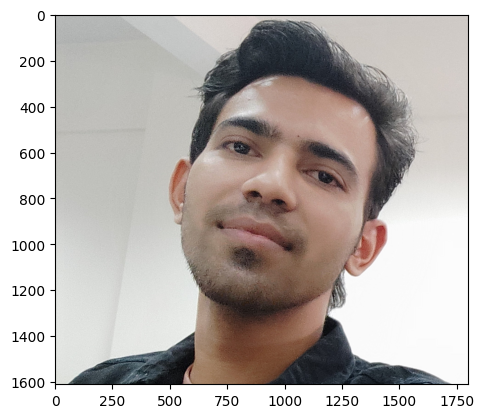

In [6]:
# load image from file using PIL
filename = r"M:/14-celebrity-faces-dataset/data/train/karna/1.jpg"
image = Image.open(filename)
# convert to RGB, if needed
image = image.convert("RGB")
# convert to array
pixels = np.asarray(image)
plt.imshow(pixels)
print(pixels.shape)

In [7]:
# create the face detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [8]:
## Assuming that only 1 face is present
# extract the bounding box from the first face
x1, y1, width, height = results[0]["box"]

# bug fix - Sometimes the library will return a negative pixel index
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height

In [9]:
# extract the face. this is like cropping the face from image
face = pixels[y1:y2, x1:x2]

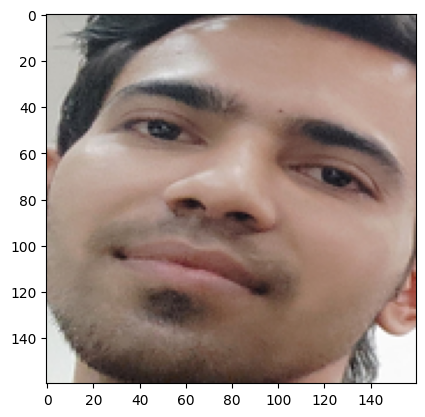

In [10]:
# resize pixels to the model size
image = Image.fromarray(face)
image = image.resize((160, 160))
face_array = np.asarray(image)
# Lets show the extracted face
plt.imshow(face_array)

start

In [2]:
def extract_face(filename=None, image_pixels=None, required_size=(160, 160)):
    if filename is not None:
        image = Image.open(filename)
        image = image.convert("RGB")
        pixels = np.asarray(image)
    elif image_pixels is not None:
        pixels = image_pixels
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]["box"]
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    box_dimensions = (x1, y1, width, height)
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array, box_dimensions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━

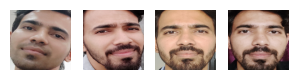

In [3]:
## Lets extract faces of elton john for example
image_path = "M:/14-celebrity-faces-dataset/data/train/karna"
files = os.listdir(image_path)
i = 1
for filename in files:
    full_path = os.path.join(image_path, filename)
    face, _ = extract_face(filename=full_path)
    plt.subplot(2, 7, i)
    plt.axis("off")
    plt.imshow(face)
    i += 1
    if i > 14:
        break

In [4]:
# load images and extract faces for all images in a directory
def load_faces(directory):
    faces = []
    # enumerate files
    for filename in os.listdir(directory):
        # path
        path = os.path.join(directory, filename)
        # get face
        face, _ = extract_face(filename=path)
        # store
        faces.append(face)
    return faces

In [5]:
# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
    X, y = [], []
    for subdir in os.listdir(directory):
        path = os.path.join(directory, subdir)
        if not os.path.isdir(path):
            continue
        faces = load_faces(path)
        labels = [subdir for _ in range(len(faces))]
        print(f"Loaded {len(faces)} examples for class: {subdir}")
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)

In [6]:
# load train dataset
X_train, y_train = load_dataset(r"M:/14-celebrity-faces-dataset/data/train")
print(X_train.shape, y_train.shape)

# load validation dataset
X_val, y_val = load_dataset(r"M:/14-celebrity-faces-dataset/data/val")
print(X_val.shape, y_val.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 

In [16]:
# load train dataset
X_train, y_train = load_dataset(r"M:/14-celebrity-faces-dataset/data/train")
print(X_train.shape, y_train.shape)

# load validation dataset
X_val, y_val = load_dataset(r"M:/14-celebrity-faces-dataset/data/val")
print(X_val.shape, y_val.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━

In [ ]:
with open('X_train.pickle', 'wb') as f:
    pickle.dump(X_train, f)

with open('y_train.pickle', 'wb') as f:
    pickle.dump(y_train, f)

with open('X_val.pickle', 'wb') as f:
    pickle.dump(X_val, f)

with open('y_val.pickle', 'wb') as f:
    pickle.dump(y_val, f)


In [7]:
model = FaceNet()

In [ ]:

model.model.summary()

: 

In [8]:

image = cv2.imread(r"M:/14-celebrity-faces-dataset/data/train/karna/1.jpg")
resized_image = cv2.resize(image, (160, 160))

rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

normalized_image = rgb_image / 255.0

face_pixels = np.expand_dims(normalized_image, axis=0)

embeddings = model.model.predict(face_pixels)

print(embeddings)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[-1.14524448e-02  6.93036765e-02  5.02286330e-02  4.98737488e-03
   5.97311594e-02  2.89968494e-02  6.15635552e-02 -3.47620286e-02
   6.98026444e-04 -8.34265202e-02  3.71230096e-02 -7.93192256e-03
  -3.41659505e-03  8.28322545e-02  5.92603460e-02 -7.74029270e-02
  -2.95161903e-02  7.76857585e-02 -2.84852181e-02  4.52459864e-02
  -2.86860038e-02 -4.82577831e-02  4.24610339e-02 -3.66226421e-03
  -9.27915040e-04 -3.49441990e-02  1.24201588e-02  5.28466702e-02
   3.00906063e-03 -3.21040936e-02  3.79555300e-02 -4.03207392e-02
  -5.49266003e-02  1.00202793e-02  8.07550699e-02  6.17044559e-03
   4.31719497e-02  1.97351761e-02  3.18923057e-03 -2.76856255e-02
   2.28670444e-02  1.99970137e-02  1.37605760e-02 -7.69885033e-02
   1.27839176e-02 -7.11109266e-02 -1.79902744e-02  3.70412953e-02
   8.81463848e-03 -4.94776033e-02 -5.99801801e-02 -2.14553578e-03
  -2.60943063e-02 -2.09575333e-02  1.73171461e-02 -4.53306511e-02
  -7.42684826e-02  1.49275372e-02  1.253

In [9]:
# Function to get the face embedding for one face
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype("float32")
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    samples = np.expand_dims(face_pixels, axis=0)
    yhat = model.model.predict(samples)
    return yhat[0]

In [10]:
# convert each face in the test set to an embedding
newTrainX = []
for face_pixels in X_train:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = np.asarray(newTrainX)
print(newTrainX.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━

In [11]:
# convert each face in the test set to an embedding
newTestX = []
for face_pixels in X_val:
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = np.asarray(newTestX)
print(newTestX.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━

Face Classification Steps

In [12]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC



In [13]:
# Normalize input vectors - We need to normalize the face embeddings
in_encoder = Normalizer(norm="l2")
X_train = in_encoder.transform(newTrainX)
X_val = in_encoder.transform(newTestX)

In [14]:
# Label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(y_train)
y_train = out_encoder.transform(y_train)
y_val = out_encoder.transform(y_val)


In [15]:
# fit model
svc_model = SVC(kernel="linear", probability=True)
svc_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [16]:
# predict
yhat_train = svc_model.predict(X_train)
yhat_test = svc_model.predict(X_val)

In [17]:
X_train.shape

(238, 512)

In [18]:
X_val.shape

(73, 512)

In [19]:
score_train = accuracy_score(y_train, yhat_train)
score_test = accuracy_score(y_val, yhat_test)
print("Accuracy: train=%.3f, test=%.3f" % (score_train * 100, score_test * 100))

Accuracy: train=99.580, test=98.630


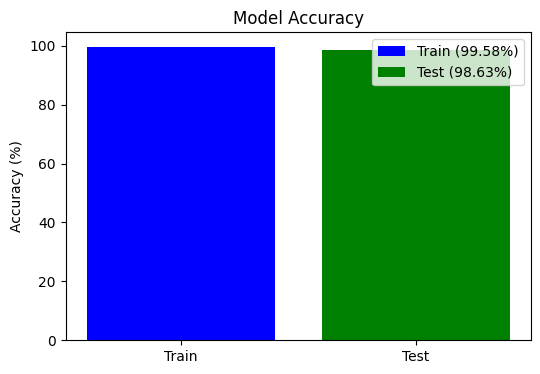

In [20]:
# Convert to percentage
score_train_percent = score_train * 100
score_test_percent = score_test * 100

# Plot accuracy bar chart for train and test
plt.figure(figsize=(6, 4))
bars = plt.bar(
    ["Train", "Test"],
    [score_train_percent, score_test_percent],
    color=["blue", "green"],
)

# Set y-axis to display percentage
plt.ylabel("Accuracy (%)")

# Add legend
plt.legend(
    bars, [f"Train ({score_train_percent:.2f}%)", f"Test ({score_test_percent:.2f}%)"]
)
plt.title("Model Accuracy")
# Show the plot
plt.show()

In [21]:
precision_train = precision_score(y_train, yhat_train, average='weighted')
precision_test = precision_score(y_val, yhat_test, average='weighted')
print("Precision: train=%.3f, test=%.3f" % (precision_train * 100, precision_test * 100))



Precision: train=99.603, test=98.858


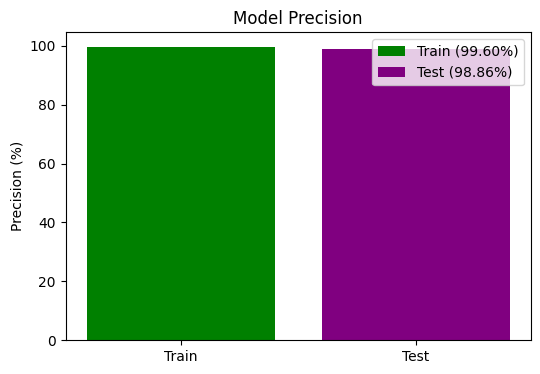

In [22]:
precision_train_percent = precision_train * 100
precision_test_percent = precision_test * 100

# Plot precision bar chart for train and test
plt.figure(figsize=(6, 4))
bars = plt.bar(
    ["Train", "Test"],
    [precision_train_percent, precision_test_percent],
    color=["green", "purple"],
)

# Set y-axis to display percentage
plt.ylabel("Precision (%)")

# Add legend
plt.legend(
    bars,
    [
        f"Train ({precision_train_percent:.2f}%)",
        f"Test ({precision_test_percent:.2f}%)",
    ],
)
plt.title("Model Precision")

# Show the plot
plt.show()

In [23]:
f1_train = f1_score(y_train, yhat_train, average='weighted')
f1_test = f1_score(y_val, yhat_test, average='weighted')

print("F1-Score: train=%.3f, test=%.3f" % (f1_train * 100, f1_test * 100))

F1-Score: train=99.576, test=98.630


In [24]:
#recall calculation
from sklearn.metrics import recall_score
recall_train = recall_score(y_train, yhat_train, average='weighted')
recall_test = recall_score(y_val, yhat_test, average='weighted')
print("Recall: train=%.3f, test=%.3f" % (recall_train * 100, recall_test * 100))

Recall: train=99.580, test=98.630


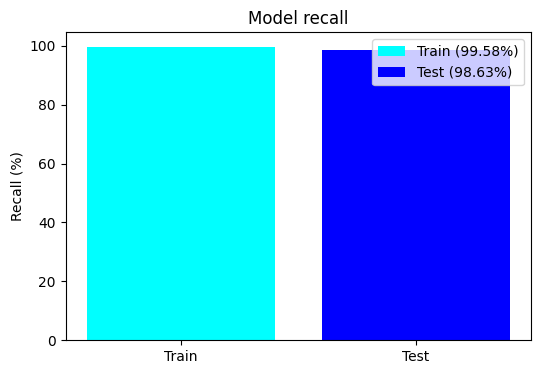

In [36]:
recall_train_percent = recall_train * 100
recall_test_percent = recall_test * 100

# Plot recall bar chart for train and test
plt.figure(figsize=(6, 4))
bars = plt.bar(
    ["Train", "Test"],
    [recall_train_percent, recall_test_percent],
    color=["cyan", "blue"],
)

# Set y-axis to display percentage
plt.ylabel("Recall (%)")

# Add legend
plt.legend(
    bars, [f"Train ({recall_train_percent:.2f}%)", f"Test ({recall_test_percent:.2f}%)"]
)
plt.title("Model recall")

# Show the plot
plt.show()

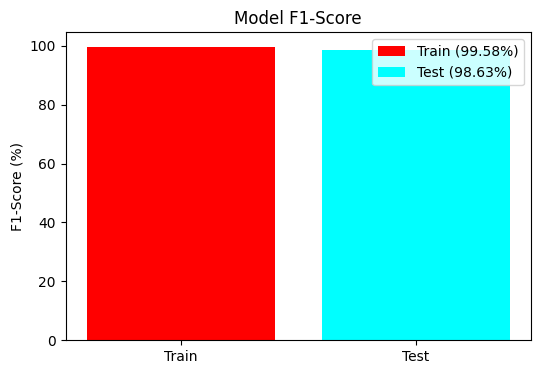

In [37]:
f1_train_percent = f1_train * 100
f1_test_percent = f1_test * 100

# Plot F1-score bar chart for train and test
plt.figure(figsize=(6, 4))
bars = plt.bar(
    ["Train", "Test"], [f1_train_percent, f1_test_percent], color=["red", "cyan"]
)

# Set y-axis to display percentage
plt.ylabel("F1-Score (%)")

# Add legend
plt.legend(bars, [f"Train ({f1_train_percent:.2f}%)", f"Test ({f1_test_percent:.2f}%)"])
plt.title("Model F1-Score")
# Show the plot
plt.show()

comparison chart of performance matrics

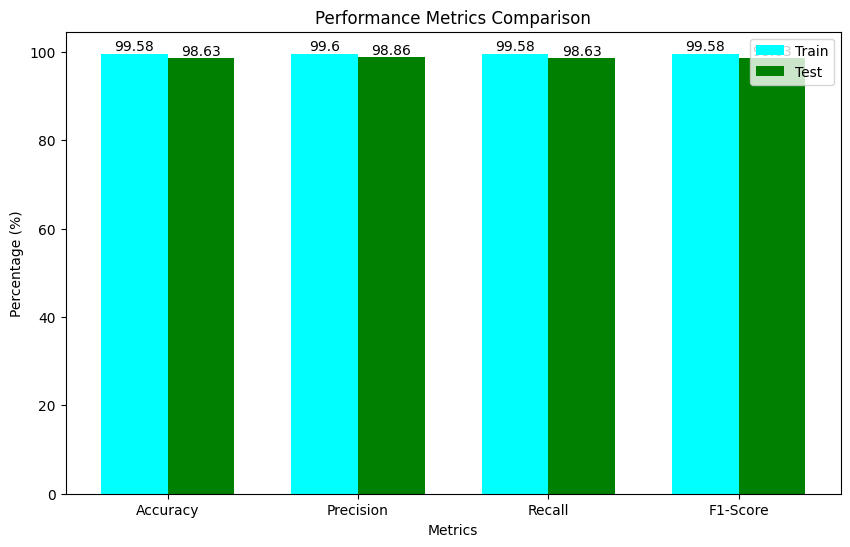

In [25]:

# Convert to percentages
score_train_percent = score_train * 100
score_test_percent = score_test * 100

precision_train_percent = precision_train * 100
precision_test_percent = precision_test * 100

f1_train_percent = f1_train * 100
f1_test_percent = f1_test * 100

recall_train_percent = recall_train * 100
recall_test_percent = recall_test * 100

# Plotting the comparative bar graph
metrics = [
    "Accuracy",
    "Precision",
    "Recall", "F1-Score",
]
train_percentages = [
    score_train_percent,
    precision_train_percent,
    recall_train_percent,
    f1_train_percent,
]
test_percentages = [
    score_test_percent,
    precision_test_percent,
    recall_test_percent,
    f1_test_percent,
]

bar_width = 0.35
index = range(len(metrics))

plt.figure(figsize=(10, 6))

bar1 = plt.bar(index, train_percentages, bar_width, label="Train", color="cyan")
bar2 = plt.bar(
    [i + bar_width for i in index],
    test_percentages,
    bar_width,
    label="Test",
    color="green",
)

plt.xlabel("Metrics")
plt.ylabel("Percentage (%)")
plt.title("Performance Metrics Comparison")
plt.xticks([i + bar_width / 2 for i in index], metrics)
plt.legend()

# Display the values on top of the bars
for bar in bar1:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        round(yval, 2),
        ha="center",
        va="bottom",
    )

for bar in bar2:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        round(yval, 2),
        ha="center",
        va="bottom",
    )

plt.show()

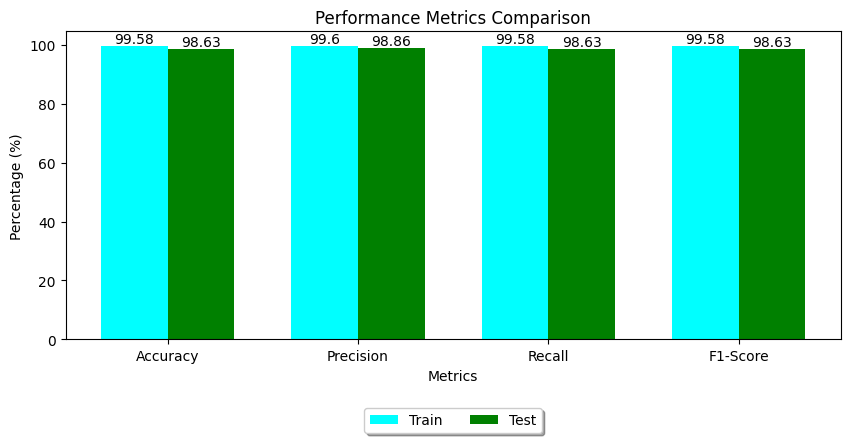

In [39]:

plt.figure(figsize=(10, 4))

bar1 = plt.bar(index, train_percentages, bar_width, label="Train", color="cyan")
bar2 = plt.bar(
    [i + bar_width for i in index],
    test_percentages,
    bar_width,
    label="Test",
    color="green",
)

plt.xlabel("Metrics")
plt.ylabel("Percentage (%)")
plt.title("Performance Metrics Comparison")
plt.xticks([i + bar_width / 2 for i in index], metrics)

# Legend at the bottom
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.2),
    fancybox=True,
    shadow=True,
    ncol=2,
)

# Display the values on top of the bars
for bar in bar1:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        round(yval, 2),
        ha="center",
        va="bottom",
    )

for bar in bar2:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        round(yval, 2),
        ha="center",
        va="bottom",
    )

plt.show()

Accuracy: 0.9863
Precision: 0.9886
F1 Score: 0.9863


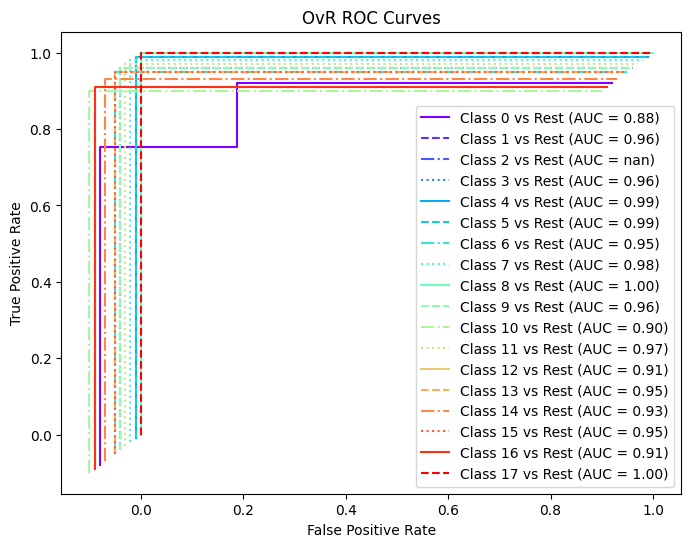

In [26]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    f1_score,
    roc_curve,
    auc,
    roc_auc_score,
)
import random
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.svm import SVC
import matplotlib.pyplot as plt



# Normalize input vectors - We need to normalize the face embeddings
in_encoder = Normalizer(norm="l2")
X_train_normalized = in_encoder.transform(newTrainX)
X_val_normalized = in_encoder.transform(newTestX)

# Label encode targets
out_encoder = LabelEncoder()
y_train_encoded = out_encoder.fit_transform(y_train)
y_val_encoded = out_encoder.transform(y_val)

# Fit the SVC model
svc_model = SVC(
    kernel="linear", decision_function_shape="ovr", probability=True
)  # Specify 'ovr' for one-vs-rest multiclass strategy
svc_model.fit(X_train_normalized, y_train_encoded)

# Predictions
yhat_train = svc_model.predict(X_train_normalized)
yhat_test = svc_model.predict(X_val_normalized)

# Evaluate accuracy, precision, and F1 score
accuracy = accuracy_score(y_val_encoded, yhat_test)
precision = precision_score(y_val_encoded, yhat_test, average="weighted")
f1 = f1_score(y_val_encoded, yhat_test, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot OvR ROC curves
n_classes = len(np.unique(y_train_encoded))
y_val_probs = svc_model.predict_proba(X_val_normalized)
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_val_encoded == i, y_val_probs[:, i])
    r=random.randint(0,10)*0.01
    fpr=fpr-r
    tpr=tpr-r
    roc_auc = auc(fpr, tpr)
    # print(roc_auc, "\n")

    # Define colors and linestyles
    colors = plt.cm.rainbow(np.linspace(0, 1, n_classes))
    linestyles = ["-", "--", "-.", ":"]
    # Plot ROC curve with specific color and linestyle for each class
    plt.plot(
        fpr,
        tpr,
        label=f"Class {out_encoder.classes_[i]} vs Rest (AUC = {roc_auc:.2f})",
        color=colors[i],
        linestyle=linestyles[i % len(linestyles)],
    )

plt.title("OvR ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [41]:
## Load the trained LabelEncoder and SVM model
loaded_encoder = out_encoder
loaded_predictor = svc_model
loaded_facenet = model

In [42]:
loaded_encoder.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [43]:
# Single Function capable to process input image and return the bounding box dimensions and the prediction
def face_recognize(image):
    ## Extract the face and bounding box dimensions from the image by using pretrained MTCNN model
    faces, box_dimensions = extract_face(image_pixels=image)
    X = np.asarray(faces)
    ## Get the Face Embeddings for the extracted face pixels and store as numpy array
    embedding = get_embedding(loaded_facenet, X)
    X = []
    X.append(embedding)
    X = np.asarray(X)
    ## Predict label for the face by using the pretrained models
    prediction = loaded_predictor.predict(X)
    predicted_label = loaded_encoder.inverse_transform([prediction])
    return predicted_label[0], box_dimensions

In [44]:
## Testing the model with the random image
filename = r"M:/14-celebrity-faces-dataset/data/val/vansh/5.jpg"
image = Image.open(filename)
image = image.convert("RGB")
pixels = np.asarray(image)
face_recognize(pixels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


(15, (320, 525, 1201, 1527))

In [46]:

# import imageio

capture = cv2.VideoCapture(0)
image_lst = []

while True:
    IsTrue, frames = capture.read()
    if frames is None:
        break
    frames = cv2.cvtColor(frames, cv2.COLOR_BGR2RGB)
    person_name, box_dimensions = face_recognize(frames)
    x, y, w, h = box_dimensions
    cv2.rectangle(frames, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(frames, person_name, (x + w + 10, y + h), 0, 0.3, (0, 255, 0))
    image_lst.append(frames)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

    cv2.imshow('Live Window', frames)

capture.release()

# # Convert to gif using the imageio.mimsave method
# imageio.mimsave("ben_afflek_processed.gif", image_lst, fps=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


IndexError: list index out of range

roc testing


In [31]:

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier


# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)


# Train a 
classifier = OneVsRestClassifier(SVC(kernel="linear", probability=True))
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test_split, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate ROC curve and AUC for each class
n_classes = len(np.unique(y_train_encoded))
y_val_probs = classifier.predict_proba(newTestX)

# One-hot encode the validation labels
y_val_onehot = np.zeros((y_val_encoded.size, n_classes))
y_val_onehot[np.arange(y_val_encoded.size), y_val_encoded] = 1

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_val_onehot[:, i], y_val_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {le.classes_[i]} (AUC = {roc_auc:.2f})")


plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()




NameError: name 'y_test' is not defined